In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# REVISAR: 
GRÁFICOS COM PONTOS

GRÁFICOS DE PRESA E PREDADOR DEVEM SER SEPARADOS, PARA QUE POSSAMOS AVALIAR A CONVERGÊNCIA VISUAL

(DOIS GRÁFICOS: 1 DE CONVERGÊNCIA PARA PRESA E OUTRO PARA PREDADOR)

# FALTA: 
CORRIGIR VERIFICAÇÃO DA SOLUÇÃO MANUFATURADA

GRÁFICO DE ERRO DA APROXIMAÇÃO À SOLUÇÃO MANUFATURADA (erro em cada instante do tempo)

VERIFICAR A ORDEM DOS MÉTODOS (para solução manufaturada)

IMPLEMENTAR O MÉTODO DO TRAÉZIO

ESTIMATIVA DE ERRO COM TRÊS APROXIMAÇÕES SUCESSIVAS - SUPLEMENTO TEÓRICO

# Modelo Presa-Predador

\begin{array}{lcl} 
\dot{x}(t) & = & 0.84x(t) - 0.27x(t)y(t) \\ 
\dot{y}(t) & = & -0.38y(t) + 0.25y(t)x(t)
\end{array}

Dados $x(0) = 3.5$ e $y(0) = 2.7$

# Euler Implícito

$x_{k+1} = x_{k} + \Delta f(t_{k+1}, x_{k+1})$
k = 0,1,2,...,n-1:

\begin{array}{lcl} 
t_{k+1} & = & t_{k} + \Delta t \\ 
X_{k+1} & \leftarrow & RESOLVEX[X - X_{k} - \Delta t f(t_{k+1}, X) = 0]
\end{array}

# Newton

$$
J(X_{k+1}^{[j]})\Delta X^{[j+1]} = - g(X_{k+1}^{[j]})
$$

A melhor aproximação para $X_{k+1}^{[0]}$ é $X_{k}$

# A Solução

Vamos integrar a função em $[0,1]$.

$t_{0} = 0$ e $t_{f} = 1$

In [53]:
#O par (x, y) representa (x_{k+1}^{[j+1]}, y_{k+1}^{[j+1]}), que é conhecido no momento da iteração
#
# As funções definidas aqui serão usadas após a verificação da solução manufaturada
#
def g1(x, y, xk, alpha1, beta1, delta):
    return x - xk - delta*(alpha1*x - beta1*x*y)

def g2(x, y, yk, alpha2, beta2, delta):
    return y - yk - delta*(-alpha2*y + beta2*x*y)

def g(x, y, xk, yk, alpha1, beta1, alpha2, beta2, delta):
    return np.array([g1(x, y, xk, alpha1, beta1, delta), g2(x, y, yk, alpha2, beta2, delta)])

#Possível Evolução: Jg específica -> Jg genérica

def Jg(x, y, alpha1, beta1, alpha2, beta2, delta):
    linha1 = [1 - delta*(alpha1 - beta1*y), delta*beta1*x]
    linha2 = [-delta*beta2*y, 1 - delta*(-alpha2 + beta2*x)]
    return np.array([linha1, linha2])

### Solução Manufaturada

Exemplo Bidimensional. Sistema:

$$
    \dfrac{dx_{1}}{dt} = \dfrac{-8}{5}x_{1}(t) + \dfrac{3}{10}x_{2}(t) \\
    \dfrac{dx_{2}}{dt} = \dfrac{8}{5}x_{1}(t) - \dfrac{4}{5}x_{2}(t) \\
    x_{1}(0) = 0 \\
    x_{2}(0) = 12
$$

Solução

$$
\left[
\begin{matrix}
     x(t) \\
     y(t)
\end{matrix}
\right]
= 
\left[
\begin{matrix}
     \dfrac{9}{4}e^{(-2/5)t} - \dfrac{9}{4}e^{-2t} \\
     9e^{(-2/5)t} + 3e^{-2t}
\end{matrix}
\right]
$$

In [8]:
a1_manufaturada, b1_manufaturada, a2_manufaturada, b2_manufaturada = -8/5.0, 3/10.0, 8/5.0, -4/5.0 
x0_manufaturada, y0_manufaturada = 0, 12

In [15]:
#esse par (x, y) representa (x_{k+1}^{[j+1]}, y_{k+1}^{[j+1]}), que é conhecido no momento da iteração

def g1_manufaturada(x, y, xk, alpha1, beta1, delta):
    return x - xk - delta*(alpha1*x + beta1*y)

def g2_manufaturada(x, y, yk, alpha2, beta2, delta):
    return y - yk - delta*(alpha2*x + beta2*y)

def g_manufaturada(x, y, xk, yk, alpha1, beta1, alpha2, beta2, delta):
    return np.array([g1_manufaturada(x, y, xk, alpha1, beta1, delta), g2_manufaturada(x, y, yk, alpha2, beta2, delta)])

#Possível Evolução: Jg específica -> Jg genérica
def Jg_manufaturada(x, y, alpha1, beta1, alpha2, beta2, delta):
    linha1 = [1 - delta*alpha1, -delta*beta1]
    linha2 = [-delta*alpha2, 1 - delta*beta2]
    return np.array([linha1, linha2])

### O Modelo

In [11]:
##### Evolução c. parada: SEM critério de parada -> critério de parada decente
##
## SEGUNDO O PROFESSOR, O IDEAL É TESTAR COM MUITAS ITERAÇÕES PARA A SOLUÇÃO MANUFATURADA, E, APÓS VERIFICARMOS
## QUE O MÉTODO FOI CORRETAMENTE IMPLEMENTADO, RODAR NEWTON COM ALGUMAS ITERAÇÕES (TIPO 3)
##
#X = X_{k+1}^{[j]}

#Note que esse newton não recebe nem Jg nem g, mas usa os globais. Evolução: funcoes globais -> funcoes locais (reaproveitamento de codgo)
def newton2D(x, y, xk, yk, delta, a1, b1, a2, b2, Jg, g):
    deltaX = np.linalg.solve(Jg(x, y, a1, b1, a2, b2, delta), -g(x, y, xk, yk, a1, b1, a2, b2, delta))
    return np.array([x, y]) + deltaX

In [34]:
##============================================================
## ESTE MÉTODO CONTÉM DUAS ITERAÇÕES DO NEWTON 
## PARA MAIS ITERAÇÕES, BASTA RODARMOS:
##
## for i in range(numero_de_iteracoes):
##   deltaX = np.linalg.solve(Jg(x, y, a1, b1, a2, b2, delta), -g(x, y, xk, yk, a1, b1, a2, b2, delta))
##   xk = x
##   yk = y
##   x = x + deltaX[0]
##   y = y + deltaX[1]
##
##  Há um problema com essa implementação quando testada no problema manufaturado (supondo que o arquivo do PACA esteja certo) 
##  O gráfico da função fica diferente conforme o número  de iterações de newton aumenta (1 iteração dá o resultado mais próximo da suposta função teórica)
## Para ver isso, varia o N dentro de range(N). 
##===========================================================
def newton(x, y, xk, yk, delta, a1, b1, a2, b2, Jg, g):
    for i in range(3):
        deltaX = np.linalg.solve(Jg(x, y, a1, b1, a2, b2, delta), -g(x, y, xk, yk, a1, b1, a2, b2, delta))
        xk = x
        yk = y
        x = x + deltaX[0]
        y = y + deltaX[1]
    
    return np.array([x, y])

In [45]:
def euler_implicito(t0, tf, n, X0, RESOLVEX, a1, b1, a2, b2, Jg, g):
    h = (tf - t0)/n
    t = t0
    T = [t]
    X_t = [X0]
    for k in range(n):
        t = t + h
        T.append(t)
        Xk = X_t[len(X_t) - 1]
        
        #para enfatizar que essa variável é o X_{k+1}^{[0]}, usei Xk_pp (plus plus)
        
        Xk_pp_inicial = Xk
        X_ = RESOLVEX(Xk_pp_inicial[0], Xk_pp_inicial[1], Xk[0], Xk[1], h, a1, b1, a2, b2, Jg, g)
        X_t.append(X_)
    return T, X_t

### Manufaturada

In [57]:
n = 1000
t0 = 0
tf = 10
T_r, X_r = euler_implicito(t0, tf, n, np.array([x0_manufaturada, y0_manufaturada]), 
                           newton, a1_manufaturada, b1_manufaturada, a2_manufaturada, b2_manufaturada, Jg_manufaturada, g_manufaturada)

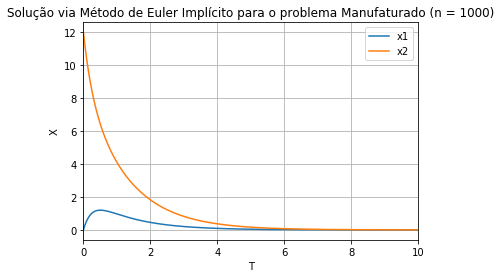

In [58]:
plt.figure()
X_r = np.array(X_r)
# Plotar as componentes de x

plt.plot(T_r, X_r.T[0], label = 'x1')
plt.plot(T_r, X_r.T[1], label = 'x2')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')
# Titulo do grafico
plt.title('Solução via Método de Euler Implícito para o problema Manufaturado (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

In [38]:
def manufaturada(t):
    linha1 = 9/4.0 * math.exp(-2/5.0 * t) - 9/4.0 * math.exp(-2*t)
    linha2 = 9*math.exp(-2/5.0 * t) + 3*math.exp(-2*t)
    return np.array([linha1, linha2])

In [43]:
T = np.arange(0, 10, 0.1)
res = []
for t in T:
    res.append(manufaturada(t))
res = np.array(res)

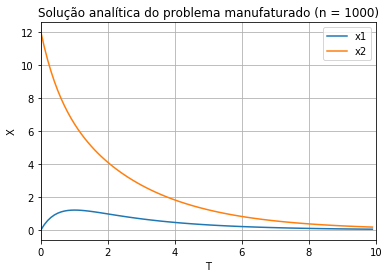

In [47]:
plt.figure()
# Plotar as componentes de x

plt.plot(T, res.T[0], label = 'x1')
plt.plot(T, res.T[1], label = 'x2')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Solução analítica do problema manufaturado (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ 0, 10 ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

### Modelo Presa-Predador

In [61]:
n = 10000
t0 = 0
tf = 50

In [62]:
a1, b1, a2, b2 = 0.84, 0.27, 0.38, 0.25 
x0, y0 = 3.5, 2.7

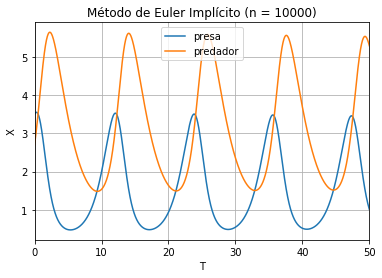

In [63]:
T_r, X_r = euler_implicito(t0, tf, n, np.array([x0, y0]), newton2D, a1, b1, a2, b2, Jg, g)

plt.figure()
X_r = np.array(X_r)
# Plotar as componentes de x

plt.plot(T_r, X_r.T[0], label = 'presa')
plt.plot(T_r, X_r.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Implícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

# Euler Explícito (EXPERIMENTO PRÉ-TRAPÉZIO)

In [64]:
def F(x, y, alpha1, beta1, alpha2, beta2):
    linha1 = x*(alpha1 - beta1*y)
    linha2 = y*(-alpha2 + beta2*x)
    return np.array([linha1, linha2])

In [98]:
def euler_explicito(t0, tf, n, X0):
    h = (tf - t0)/n
    t = t0
    T = [t]
    X_t = [X0]
    for k in range(n):
        t = t + h
        T.append(t)
        Xk = X_t[len(X_t) - 1]
        X_ = Xk + h*F(Xk[0], Xk[1], a1, b1, a2, b2)
        X_t.append(X_)
    return T, X_t

Vamos comparar as dinâmicas para passos diferentes de euler explícito

In [102]:
tf = 30
n = 100000

In [103]:
T, X = euler_explicito(t0, tf, n, np.array([x0, y0]))

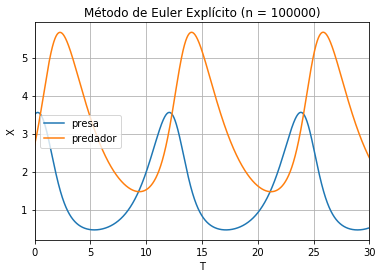

In [104]:
plt.figure()
X = np.array(X)
# Plotar as componentes de x

plt.plot(T, X.T[0], label = 'presa')
plt.plot(T, X.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Explícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

In [153]:
tf = 300
n = 10000

In [154]:
T, X = euler_explicito(t0, tf, n, np.array([x0, y0]))

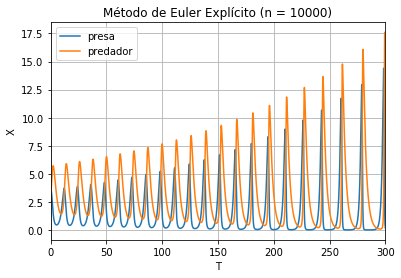

In [155]:
plt.figure()
X = np.array(X)
# Plotar as componentes de x

plt.plot(T, X.T[0], label = 'presa')
plt.plot(T, X.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Explícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

Aparentemente, quando o passo de integração $\Delta t$ não é pequeno o suficiente, as populações explodem.